In [ ]:
import kagglehub

# Download latest version of the dataset from Kaggle
path = kagglehub.dataset_download("manishabhatt22/marketing-campaign-performance-dataset")

print("Path to dataset files:", path)

/Users/suvedharam/Documents/marketing-campaign-performance/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/suvedharam/Documents/marketing-campaign-performance/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 5.02M/5.02M [00:00<00:00, 17.5MB/s]

Extracting files...
Path to dataset files: /Users/suvedharam/.cache/kagglehub/datasets/manishabhatt22/marketing-campaign-performance-dataset/versions/1


# Import Libraries 

This section of the notebook lists and imports the necessary libraries required for analyzing and evaluating the performance of a marketing campaign. These libraries may include tools for data manipulation, visualization, statistical analysis, and machine learning, depending on the scope of the analysis.
Libraries Used

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report


from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import chi2_contingency  # Optional: for chi-squared test
from scipy.stats import f_oneway
from scipy.stats import ttest_ind
from statsmodels.stats.multicomp import pairwise_tukeyhsd


# Reading Data to a DataFrame

In [11]:
df = pd.read_csv('../data/raw/marketing_campaign_dataset.csv')

print(df.columns)

Index(['Campaign_ID', 'Company', 'Campaign_Type', 'Target_Audience',
       'Duration', 'Channel_Used', 'Conversion_Rate', 'Acquisition_Cost',
       'ROI', 'Location', 'Language', 'Clicks', 'Impressions',
       'Engagement_Score', 'Customer_Segment', 'Date'],
      dtype='object')


# Exploratory Data Analysis

#### Column Data Types and Null Value Check

In [12]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Campaign_ID       200000 non-null  int64  
 1   Company           200000 non-null  object 
 2   Campaign_Type     200000 non-null  object 
 3   Target_Audience   200000 non-null  object 
 4   Duration          200000 non-null  object 
 5   Channel_Used      200000 non-null  object 
 6   Conversion_Rate   200000 non-null  float64
 7   Acquisition_Cost  200000 non-null  object 
 8   ROI               200000 non-null  float64
 9   Location          200000 non-null  object 
 10  Language          200000 non-null  object 
 11  Clicks            200000 non-null  int64  
 12  Impressions       200000 non-null  int64  
 13  Engagement_Score  200000 non-null  int64  
 14  Customer_Segment  200000 non-null  object 
 15  Date              200000 non-null  object 
dtypes: float64(2), int64

Campaign_ID         0
Company             0
Campaign_Type       0
Target_Audience     0
Duration            0
Channel_Used        0
Conversion_Rate     0
Acquisition_Cost    0
ROI                 0
Location            0
Language            0
Clicks              0
Impressions         0
Engagement_Score    0
Customer_Segment    0
Date                0
dtype: int64

#### Converting Datatype for Acquisition Cost and Date

In [13]:
#Convert 'Acquisition_Cost' to numeric
df['Acquisition_Cost'] = df['Acquisition_Cost'].replace('[\$,]', '', regex=True).astype(float)
#Conver date columns to datetime
df["Date"] = pd.to_datetime(df["Date"])

#### Uniques Values in Object column and Range in Numeric Columns

In [14]:
#distinct values in all object columns and the range of numeric columns
for col in df.columns:
    if df[col].dtype == 'object':
        print(f"{col}: {df[col].nunique()} unique values")
        print(f"Categories in {col}: {df[col].unique()}")
    else:
        print(f"{col}: {df[col].min()} to {df[col].max()}")
        

Campaign_ID: 1 to 200000
Company: 5 unique values
Categories in Company: ['Innovate Industries' 'NexGen Systems' 'Alpha Innovations'
 'DataTech Solutions' 'TechCorp']
Campaign_Type: 5 unique values
Categories in Campaign_Type: ['Email' 'Influencer' 'Display' 'Search' 'Social Media']
Target_Audience: 5 unique values
Categories in Target_Audience: ['Men 18-24' 'Women 35-44' 'Men 25-34' 'All Ages' 'Women 25-34']
Duration: 4 unique values
Categories in Duration: ['30 days' '60 days' '15 days' '45 days']
Channel_Used: 6 unique values
Categories in Channel_Used: ['Google Ads' 'YouTube' 'Instagram' 'Website' 'Facebook' 'Email']
Conversion_Rate: 0.01 to 0.15
Acquisition_Cost: 5000.0 to 20000.0
ROI: 2.0 to 8.0
Location: 5 unique values
Categories in Location: ['Chicago' 'New York' 'Los Angeles' 'Miami' 'Houston']
Language: 5 unique values
Categories in Language: ['Spanish' 'German' 'French' 'Mandarin' 'English']
Clicks: 100 to 1000
Impressions: 1000 to 10000
Engagement_Score: 1 to 10
Customer_S

## Visualizations

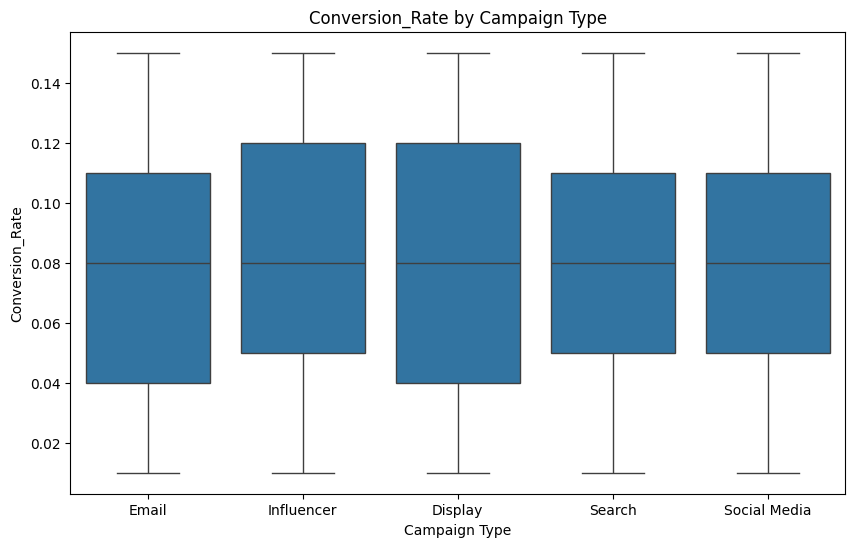

In [15]:
#Visualizing Conversion_Rate by Campaign Type
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Campaign_Type', y='Conversion_Rate')
plt.title('Conversion_Rate by Campaign Type')
plt.xlabel('Campaign Type')
plt.ylabel('Conversion_Rate')
plt.show()

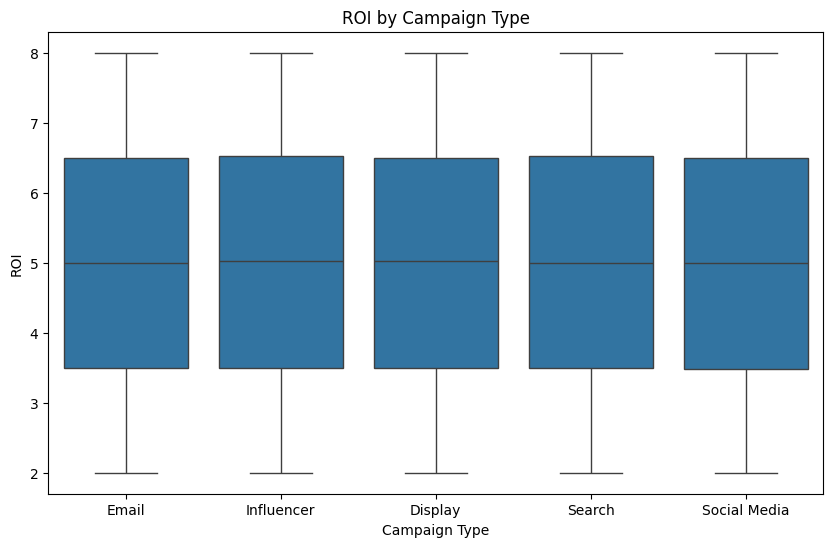

In [16]:
#Visualizing ROI by Campaign Type
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Campaign_Type', y='ROI')
plt.title('ROI by Campaign Type')
plt.xlabel('Campaign Type')
plt.ylabel('ROI')
plt.show()

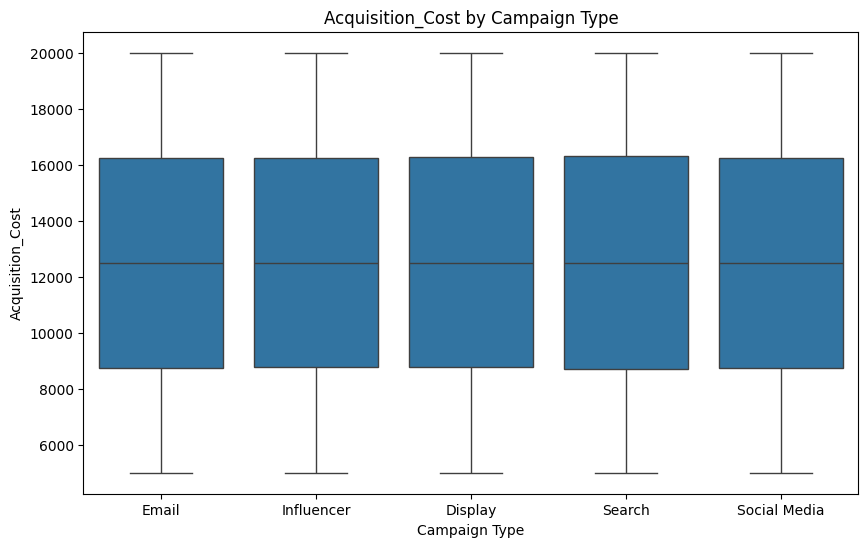

In [17]:
#Visualizing Acquisition Cost by Campaign Type
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Campaign_Type', y='Acquisition_Cost')
plt.title('Acquisition_Cost by Campaign Type')
plt.xlabel('Campaign Type')
plt.ylabel('Acquisition_Cost')
plt.show()

### Problem 1: A/B Testing for Conversion Rate on Two Campaign Types

A company has launched two marketing campaigns to increase user sign-ups:

- **Campaign A**: Email Campaign  
- **Campaign B**: Influencer Marketing Campaign  

#### Objective:  
Determine which campaign leads to a higher conversion rate (i.e., which campaign results in more users signing up after viewing the ad).

#### Definition of Success:  
A user signing up after viewing the ad is considered a success (Converted = 1).

#### Approach:  
Perform A/B Testing to compare the conversion rates of both campaigns.


#### Steps taken for A/B testing

1. Hypothesis Testing  
    i. Null Hypothesis (H₀): There is no difference in conversion rates between Campaign A (Email) and Campaign B (Influencer).  
    ii. Alternative Hypothesis (H₁): There is a significant difference in conversion rates between Campaign A and Campaign B.  

2. Test: Using a two-proportion t-test to compare the conversion rates between Campaign A and Campaign B.  

3. Significance Level: Set alpha = 0.05 (5% significance level).  
    i. If the p-value < 0.05, reject the null hypothesis, meaning one campaign performs better than the other.  
    ii. If the p-value >= 0.05, conclude that there is no statistically significant difference.  

In [20]:
# Filter conversion rates for each group
email_cr = df[df["Campaign_Type"] == "Email"]["Conversion_Rate"]
influencer_cr = df[df["Campaign_Type"] == "Influencer"]["Conversion_Rate"]

# Perform two-sample t-test
t_stat, p_val = ttest_ind(email_cr, influencer_cr, equal_var=False)  # Welch's t-test
print(f"T-statistic: {t_stat:.4f}, p-value: {p_val:.4f}")

if p_val < 0.05:
    print("Significant difference in conversion rates between Email and Influencer campaigns.")
else:
    print("No significant difference in conversion rates between Email and Influencer campaigns.")


T-statistic: -1.8351, p-value: 0.0665
No significant difference in conversion rates between Email and Influencer campaigns.


### Problem 2: Analysis of Conversion Rates Across Multiple Campaign Types

A company has launched five different marketing campaigns to increase user sign-ups:

- **Campaign A**: Email Campaign  
- **Campaign B**: Influencer Marketing Campaign  
- **Campaign C**: Display Ads Campaign  
- **Campaign D**: Social Media Campaign  
- **Campaign E**: Search Engine Ads Campaign  

#### Objective:  
Determine if there are significant differences in conversion rates among the five campaigns.

#### Definition of Success:  
A statistically significant difference in conversion rates among the campaigns would indicate that certain campaigns are more effective than others.

#### Approach:  
Perform a One-Way ANOVA test to compare the conversion rates across the five campaigns.

In [21]:
# Get conversion rates grouped by campaign type
grouped_cr = [df[df["Campaign_Type"] == campaign]["Conversion_Rate"] for campaign in df["Campaign_Type"].unique()]

# Perform one-way ANOVA
f_stat, p_val = f_oneway(*grouped_cr)
print(f"F-statistic: {f_stat:.4f}, p-value: {p_val:.4f}")

if p_val < 0.05:
    print("There is a significant difference in conversion rates among campaign types.")
else:
    print("No significant difference in conversion rates among campaign types.")


F-statistic: 0.8873, p-value: 0.4705
No significant difference in conversion rates among campaign types.


In [22]:
#Tukey’s HSD to explore if any specific pair might be marginally different, even if the overall result wasn’t.
tukey_result = pairwise_tukeyhsd(endog=df['Conversion_Rate'], groups=df['Campaign_Type'], alpha=0.05)
print(tukey_result.summary())


     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
  group1      group2    meandiff p-adj   lower  upper  reject
-------------------------------------------------------------
   Display        Email  -0.0003  0.834 -0.0011 0.0005  False
   Display   Influencer   0.0002 0.9341 -0.0006  0.001  False
   Display       Search  -0.0001 0.9993 -0.0009 0.0007  False
   Display Social Media      0.0 0.9999 -0.0007 0.0008  False
     Email   Influencer   0.0005 0.3535 -0.0003 0.0013  False
     Email       Search   0.0002 0.9273 -0.0006  0.001  False
     Email Social Media   0.0003 0.7487 -0.0004 0.0011  False
Influencer       Search  -0.0003 0.8438 -0.0011 0.0005  False
Influencer Social Media  -0.0002 0.9708  -0.001 0.0006  False
    Search Social Media   0.0001 0.9948 -0.0007 0.0009  False
-------------------------------------------------------------


### Problem 3: Analysis of ROI Across Multiple Campaign Types

A company has launched five different marketing campaigns to increase ROI:

- **Campaign A**: Email Campaign  
- **Campaign B**: Influencer Marketing Campaign  
- **Campaign C**: Display Ads Campaign  
- **Campaign D**: Social Media Campaign  
- **Campaign E**: Search Engine Ads Campaign  

#### Objective:  
Determine if there are significant differences in ROI among the five campaigns.

#### Definition of Success:  
A statistically significant difference in ROI among the campaigns would indicate that certain campaigns are more effective than others.

#### Approach:  
Perform a One-Way ANOVA test to compare the ROI across the five campaigns.

In [ ]:
#One-way ANOVA for ROI


# Assuming df is your dataframe
groups = [group["ROI"].values for name, group in df.groupby("Campaign_Type")]
f_stat, p_val = f_oneway(*groups)

print(f"F-statistic: {f_stat:.4f}, p-value: {p_val:.4f}")

if p_val < 0.05:
    print("There is a significant difference in ROI among campaign types.")
else:
    print("No significant difference in ROI among campaign types.")


F-statistic: 1.0170, p-value: 0.3969
No significant difference in ROI among campaign types.


In [ ]:
#Tukey’s HSD to explore if any specific pair might be marginally different, even if the overall result wasn’t.
tukey = pairwise_tukeyhsd(endog=df["ROI"],
                          groups=df["Campaign_Type"],
                          alpha=0.05)
print(tukey.summary())


     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
  group1      group2    meandiff p-adj   lower  upper  reject
-------------------------------------------------------------
   Display        Email  -0.0123 0.8562 -0.0457 0.0212  False
   Display   Influencer   0.0045 0.9961 -0.0289 0.0379  False
   Display       Search   0.0018 0.9999 -0.0316 0.0352  False
   Display Social Media  -0.0148 0.7499 -0.0483 0.0187  False
     Email   Influencer   0.0168 0.6483 -0.0167 0.0502  False
     Email       Search   0.0141 0.7816 -0.0194 0.0475  False
     Email Social Media  -0.0025 0.9996  -0.036  0.031  False
Influencer       Search  -0.0027 0.9995 -0.0361 0.0307  False
Influencer Social Media  -0.0193 0.5153 -0.0527 0.0142  False
    Search Social Media  -0.0166 0.6591   -0.05 0.0169  False
-------------------------------------------------------------


### Problem 4: Analysis of Acquisition Cost Across Multiple Campaign Types

A company has launched five different marketing campaigns to analyze acquisition costs:

- **Campaign A**: Email Campaign  
- **Campaign B**: Influencer Marketing Campaign  
- **Campaign C**: Display Ads Campaign  
- **Campaign D**: Social Media Campaign  
- **Campaign E**: Search Engine Ads Campaign  

#### Objective:  
Determine if there are significant differences in acquisition costs among the five campaigns.

#### Definition of Success:  
A statistically significant difference in acquisition costs among the campaigns would indicate that certain campaigns are more cost-effective than others.

#### Approach:  
Perform a One-Way ANOVA test to compare the acquisition costs across the five campaigns.

In [23]:
#One-way ANOVA for Acquisition Cost
groups_ac = [group["Acquisition_Cost"].values for _, group in df.groupby("Campaign_Type")]
f_stat_ac, p_val_ac = f_oneway(*groups_ac)

print(f"F-statistic: {f_stat_ac:.4f}, p-value: {p_val_ac:.4f}")

if p_val_ac < 0.05: 
    print("There is a significant difference in Acquisition Cost among campaign types.")
else:
    print("No significant difference in Acquisition Cost among campaign types.")


F-statistic: 0.1081, p-value: 0.9797
No significant difference in Acquisition Cost among campaign types.


In [24]:
#Tukey’s HSD to explore if any specific pair might be marginally different, even if the overall result wasn’t.

tukey_ac = pairwise_tukeyhsd(endog=df["Acquisition_Cost"],
                              groups=df["Campaign_Type"],
                              alpha=0.05)
print(tukey_ac.summary())


      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
  group1      group2    meandiff p-adj   lower    upper  reject
---------------------------------------------------------------
   Display        Email -12.6884 0.9939 -96.4302 71.0534  False
   Display   Influencer  -0.8641    1.0 -84.4497 82.7215  False
   Display       Search   -9.298 0.9982 -92.8898 74.2938  False
   Display Social Media   4.6636 0.9999 -79.1061 88.4333  False
     Email   Influencer  11.8242 0.9953 -71.8228 95.4713  False
     Email       Search   3.3904    1.0 -80.2629 87.0436  False
     Email Social Media   17.352 0.9801  -66.479 101.183  False
Influencer       Search  -8.4339 0.9987 -91.9307  75.063  False
Influencer Social Media   5.5278 0.9998 -78.1472 89.2027  False
    Search Social Media  13.9616 0.9912 -69.7195 97.6428  False
---------------------------------------------------------------


### Exploring Causal Effect: Does Campaign Type Influence Conversion Rate , ROI , Acquisition Cost?

Using Propensity Score Matching to evaluate the causal impact of Campaign Type on Conversion Rate, ROI and Acquisition Cost by balancing treatment (specific campaign types) and controlling for confounding variables, ensuring an accurate estimation of the treatment effect.

Calculate Propensity Score

In [28]:
# Convert categorical variables to numeric (use one-hot encoding)
df_encoded = pd.get_dummies(df, drop_first=True)

# Define the target variable (treatment: Influencer vs other types)
df_encoded['Campaign_Type_Influencer'] = df_encoded['Campaign_Type_Influencer'].astype(int)

# Select features (exclude 'Campaign_ID' and any other non-predictor columns)
X = df_encoded.drop(columns=['Campaign_ID','Campaign_Type_Influencer','Date'])
y = df_encoded['Campaign_Type_Influencer']

# Separate numeric and non-numeric columns
numeric_columns = X.select_dtypes(include=['float64', 'int64']).columns
non_numeric_columns = X.select_dtypes(exclude=['float64', 'int64']).columns
print("Numeric columns:", numeric_columns)
print("Non-numeric columns:", non_numeric_columns)  

# Now scale only the numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[numeric_columns])

# Combine the scaled numeric features back with the non-numeric columns
X_scaled_df = pd.DataFrame(X_scaled, columns=numeric_columns)
X_final = pd.concat([X_scaled_df, X[non_numeric_columns].reset_index(drop=True)], axis=1)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

# Fit the Logistic Regression Model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Predict the propensity scores on the test set
propensity_scores = logreg.predict_proba(X_test)[:, 1]  # Probability of being in the 'Influencer' campaign

# Assign propensity scores back to the original dataframe
df_encoded['propensity_score'] = logreg.predict_proba(X_final)[:, 1]



Numeric columns: Index(['Conversion_Rate', 'Acquisition_Cost', 'ROI', 'Clicks', 'Impressions',
       'Engagement_Score'],
      dtype='object')
Non-numeric columns: Index(['Company_DataTech Solutions', 'Company_Innovate Industries',
       'Company_NexGen Systems', 'Company_TechCorp', 'Campaign_Type_Email',
       'Campaign_Type_Search', 'Campaign_Type_Social Media',
       'Target_Audience_Men 18-24', 'Target_Audience_Men 25-34',
       'Target_Audience_Women 25-34', 'Target_Audience_Women 35-44',
       'Duration_30 days', 'Duration_45 days', 'Duration_60 days',
       'Channel_Used_Facebook', 'Channel_Used_Google Ads',
       'Channel_Used_Instagram', 'Channel_Used_Website',
       'Channel_Used_YouTube', 'Location_Houston', 'Location_Los Angeles',
       'Location_Miami', 'Location_New York', 'Language_French',
       'Language_German', 'Language_Mandarin', 'Language_Spanish',
       'Customer_Segment_Foodies', 'Customer_Segment_Health & Wellness',
       'Customer_Segment_Outdoor

Matching Treated and Untreated Units

In [29]:
from sklearn.neighbors import NearestNeighbors
import pandas as pd

# Identifying treated and untreated groups
treated = df_encoded[df_encoded['Campaign_Type_Influencer'] == 1]  # Influencer campaign (treated)
untreated = df_encoded[df_encoded['Campaign_Type_Influencer'] == 0]  # Other campaigns (untreated)

treated_scores = treated[['propensity_score']].values  # Convert to 2D array
untreated_scores = untreated[['propensity_score']].values  # Convert to 2D array

print("Treated scores shape:", treated_scores.shape)
print("Untreated scores shape:", untreated_scores.shape)

# Use Nearest Neighbors to match treated and untreated units based on propensity score
nn = NearestNeighbors(n_neighbors=1)
nn.fit(untreated[['propensity_score']])  # Fit on the untreated units

# Find the nearest neighbors (i.e., the closest untreated units for each treated unit)
distances, indices = nn.kneighbors(treated[['propensity_score']])

# Get the matched untreated units
matched_untreated = untreated.iloc[indices.flatten()]

# Combine treated and matched untreated units
matched_data = pd.concat([treated, matched_untreated], axis=0)
print(matched_data.head())


Treated scores shape: (40169, 1)
Untreated scores shape: (159831, 1)
    Campaign_ID  Conversion_Rate  Acquisition_Cost   ROI  Clicks  Impressions  \
2             3             0.07           10200.0  7.18     584         7698   
11           12             0.05           17502.0  3.59     659         8948   
17           18             0.14            9485.0  4.48     218         9264   
19           20             0.09           10258.0  3.83     193         3677   
21           22             0.02           12824.0  6.21     319         8586   

    Engagement_Score       Date  Company_DataTech Solutions  \
2                  1 2021-01-03                       False   
11                 1 2021-01-12                       False   
17                 9 2021-01-18                       False   
19                 1 2021-01-20                        True   
21                 2 2021-01-22                       False   

    Company_Innovate Industries  ...  Location_New York  Language

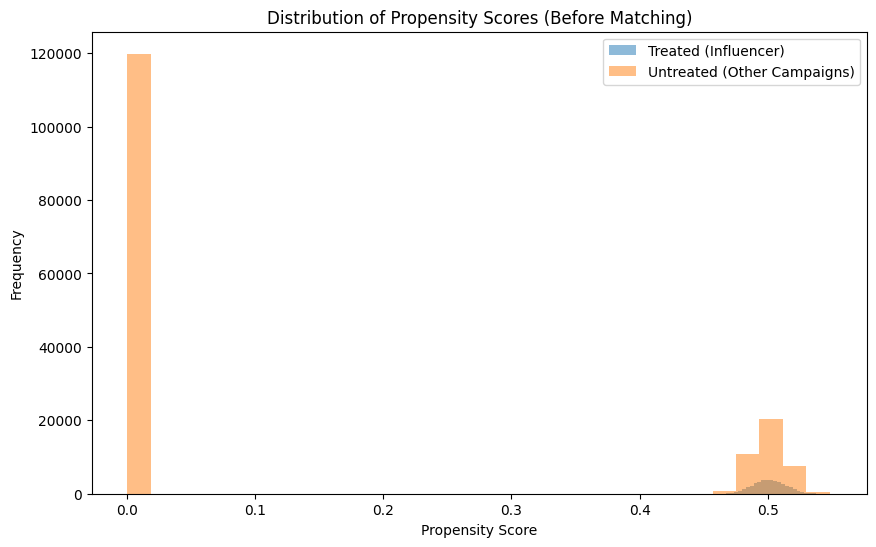

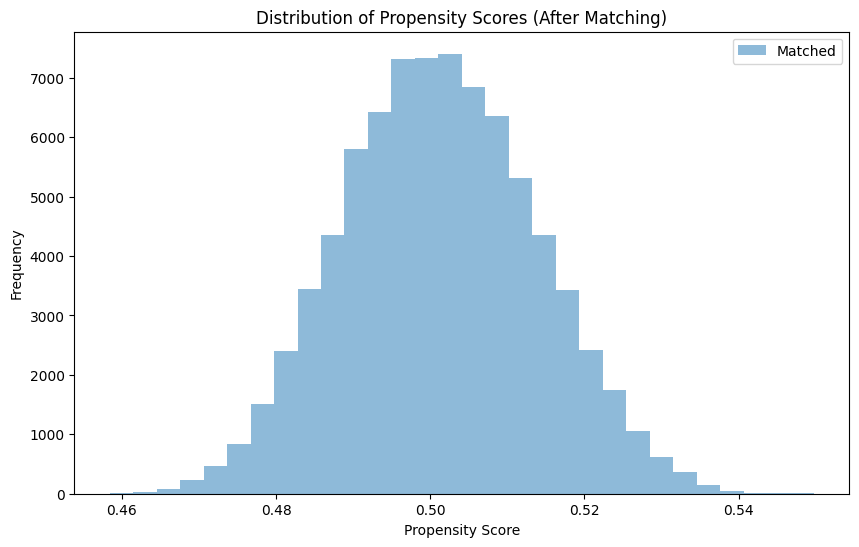

In [30]:
import matplotlib.pyplot as plt

# Visualize the distribution of propensity scores before matching
plt.figure(figsize=(10,6))
plt.hist(treated['propensity_score'], bins=30, alpha=0.5, label='Treated (Influencer)')
plt.hist(untreated['propensity_score'], bins=30, alpha=0.5, label='Untreated (Other Campaigns)')
plt.xlabel('Propensity Score')
plt.ylabel('Frequency')
plt.legend()
plt.title('Distribution of Propensity Scores (Before Matching)')
plt.show()

# Now visualize after matching
plt.figure(figsize=(10,6))
plt.hist(matched_data['propensity_score'], bins=30, alpha=0.5, label='Matched')
plt.xlabel('Propensity Score')
plt.ylabel('Frequency')
plt.legend()
plt.title('Distribution of Propensity Scores (After Matching)')
plt.show()



In [31]:
# Calculate mean conversion rate for treated and matched untreated groups
treated_conversion_rate = treated['Conversion_Rate'].mean()
matched_untreated_conversion_rate = matched_untreated['Conversion_Rate'].mean()

print(f"Mean Conversion Rate for Treated (Influencer): {treated_conversion_rate}")
print(f"Mean Conversion Rate for Matched Untreated: {matched_untreated_conversion_rate}")

# Calculate the difference in conversion rates
effect_of_treatment = treated_conversion_rate - matched_untreated_conversion_rate
print(f"Effect of Treatment (Influencer) on Conversion Rate: {effect_of_treatment}")


Mean Conversion Rate for Treated (Influencer): 0.08031467051706541
Mean Conversion Rate for Matched Untreated: 0.0803004804700142
Effect of Treatment (Influencer) on Conversion Rate: 1.419004705120741e-05


In [32]:
from scipy import stats

# Perform t-test for difference in conversion rates
t_stat, p_value = stats.ttest_ind(treated['Conversion_Rate'], matched_untreated['Conversion_Rate'])

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Check for significance at 5% significance level
if p_value < 0.05:
    print("There is a statistically significant difference in conversion rates between treated and untreated groups.")
else:
    print("There is no statistically significant difference in conversion rates between treated and untreated groups.")


T-statistic: 0.049626386543557645
P-value: 0.9604202424847454
There is no statistically significant difference in conversion rates between treated and untreated groups.


In [37]:
# Calculate mean conversion rate for treated and matched untreated groups
treated_conversion_rate = treated['ROI'].mean()
matched_untreated_conversion_rate = matched_untreated['ROI'].mean()

print(f"Mean Conversion Rate for Treated (Influencer): {treated_conversion_rate}")
print(f"Mean Conversion Rate for Matched Untreated: {matched_untreated_conversion_rate}")

# Calculate the difference in conversion rates
effect_of_treatment = treated_conversion_rate - matched_untreated_conversion_rate
print(f"Effect of Treatment (Influencer) on ROI: {effect_of_treatment}")


Mean Conversion Rate for Treated (Influencer): 5.011068236699942
Mean Conversion Rate for Matched Untreated: 5.020033608006174
Effect of Treatment (Influencer) on ROI: -0.008965371306231873


In [ ]:


# Perform t-test for difference in conversion rates
t_stat, p_value = stats.ttest_ind(treated['ROI'], matched_untreated['ROI'])

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Check for significance at 5% significance level
if p_value < 0.05:
    print("There is a statistically significant difference in ROI between treated and untreated groups.")
else:
    print("There is no statistically significant difference in ROI between treated and untreated groups.")


T-statistic: -0.7324464613811166
P-value: 0.46389824618690234
There is no statistically significant difference in conversion rates between treated and untreated groups.


In [39]:
# Calculate mean conversion rate for treated and matched untreated groups
treated_acquisition_cost = treated['Acquisition_Cost'].mean()
matched_untreated_acquisition_cost = matched_untreated['Acquisition_Cost'].mean()

print(f"Mean Conversion Rate for Treated (Influencer): {treated_acquisition_cost}")
print(f"Mean Conversion Rate for Matched Untreated: {matched_untreated_acquisition_cost}")

# Calculate the difference in conversion rates
effect_of_treatment = treated_acquisition_cost - matched_untreated_acquisition_cost
print(f"Effect of Treatment (Influencer) on Acuisition Cost: {effect_of_treatment}")


Mean Conversion Rate for Treated (Influencer): 12507.170330354253
Mean Conversion Rate for Matched Untreated: 12506.518534193034
Effect of Treatment (Influencer) on Acuisition Cost: 0.6517961612189538


In [40]:
from scipy import stats

# Perform t-test for difference in conversion rates
t_stat, p_value = stats.ttest_ind(treated['Acquisition_Cost'], matched_untreated['Acquisition_Cost'])

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Check for significance at 5% significance level
if p_value < 0.05:
    print("There is a statistically significant difference in Acuisition Cost between treated and untreated groups.")
else:
    print("There is no statistically significant difference in Acuisition Cost between treated and untreated groups.")


T-statistic: 0.021315328960167235
P-value: 0.9829941688125017
There is no statistically significant difference in Acuisition Cost between treated and untreated groups.


### Simulating a Randomized Controlled Trial (RCT)

In this section, we aim to simulate a randomized controlled trial (RCT) by randomly assigning units (e.g., customers, campaigns) to either a treatment group (e.g., Influencer campaign) or a control group (e.g., other campaign types). This allows us to evaluate the causal impact of the treatment by comparing outcomes between the two groups.

#### Key Steps in Simulating the Experiment:
1. **Random Treatment Assignment**: Randomly assign units to either the treatment group (Influencer campaign) or the control group.
2. **Define Outcome Variables**: Identify the metrics to evaluate, such as Conversion Rate, Acquisition Cost, and ROI.
3. **Simulate Treatment Effects**: Introduce a simulated treatment effect based on assumptions or expected improvements in the outcome metrics for the treatment group.
4. **Random Data Splitting**: Randomly divide the data into treatment and control groups.
5. **Outcome Measurement**: Compare the outcome metrics between the treatment and control groups to assess the treatment's impact.

In [42]:
import numpy as np
import pandas as pd


np.random.seed(42)  # For reproducibility

# Create a treatment column where 1 means treated (Influencer) and 0 means control (others)
df_encoded['Treatment'] = np.random.choice([0, 1], size=len(df_encoded), p=[0.5, 0.5])

# Check if the treatment assignment is random (roughly 50% in each group)
print(df_encoded['Treatment'].value_counts())


Treatment
1    100232
0     99768
Name: count, dtype: int64


In [43]:
# Simulating treatment effect on Conversion Rate and Acquisition Cost
df_encoded['Simulated_Conversion_Rate'] = df_encoded['Conversion_Rate']
df_encoded['Simulated_Acquisition_Cost'] = df_encoded['Acquisition_Cost']

# Apply treatment effect to treated group (Influencer campaigns)
# Assuming a 2% increase in conversion rate and 10% decrease in acquisition cost
df_encoded.loc[df_encoded['Treatment'] == 1, 'Simulated_Conversion_Rate'] += 0.02
df_encoded.loc[df_encoded['Treatment'] == 1, 'Simulated_Acquisition_Cost'] *= 0.9  # 10% reduction

# Check the data
df_encoded[['Campaign_Type_Influencer','Treatment', 'Conversion_Rate', 'Simulated_Conversion_Rate', 'Acquisition_Cost', 'Simulated_Acquisition_Cost']].head()


,Campaign_Type_Influencer,Treatment,Conversion_Rate,Simulated_Conversion_Rate,Acquisition_Cost,Simulated_Acquisition_Cost
0,0,0,0.04,0.04,16174.0,16174.0
1,0,1,0.12,0.14,11566.0,10409.4
2,1,1,0.07,0.09,10200.0,9180.0
3,0,1,0.11,0.13,12724.0,11451.6
4,0,0,0.05,0.05,16452.0,16452.0


In [44]:
from scipy import stats

# Compare means of simulated conversion rate between treated and control groups
treated = df_encoded[df_encoded['Treatment'] == 1]
control = df_encoded[df_encoded['Treatment'] == 0]

# T-test for Simulated Conversion Rate
t_stat, p_val = stats.ttest_ind(treated['Simulated_Conversion_Rate'], control['Simulated_Conversion_Rate'])
print(f"T-statistic for Conversion Rate: {t_stat:.4f}, p-value: {p_val:.4f}")
if p_val < 0.05:
    print("There is a statistically significant difference in simulated conversion rates between treated and control groups.")
else:
    print("There is no statistically significant difference in simulated conversion rates between treated and control groups.")

# T-test for Simulated Acquisition Cost
t_stat, p_val = stats.ttest_ind(treated['Simulated_Acquisition_Cost'], control['Simulated_Acquisition_Cost'])
print(f"T-statistic for Acquisition Cost: {t_stat:.4f}, p-value: {p_val:.4f}")
if p_val < 0.05:
    print("There is a statistically significant difference in simulated acquisition costs between treated and control groups.")
else:
    print("There is no statistically significant difference in simulated acquisition costs between treated and control groups.")


T-statistic for Conversion Rate: 110.5502, p-value: 0.0000
There is a statistically significant difference in simulated conversion rates between treated and control groups.
T-statistic for Acquisition Cost: -69.4755, p-value: 0.0000
There is a statistically significant difference in simulated acquisition costs between treated and control groups.


In [45]:
# Mean conversion rate for treated and untreated
#Estimate Average Treatment Effect (ATE)
treated = df_encoded[df_encoded['Treatment'] == 1]
untreated = df_encoded[df_encoded['Treatment'] == 0]

ate_conversion = treated['Simulated_Conversion_Rate'].mean() - untreated['Simulated_Conversion_Rate'].mean()
ate_cost = treated['Simulated_Acquisition_Cost'].mean() - untreated['Simulated_Acquisition_Cost'].mean()

print(f"Estimated ATE on Conversion Rate: {ate_conversion:.4f}")
print(f"Estimated ATE on Acquisition Cost: {ate_cost:.4f}")


Estimated ATE on Conversion Rate: 0.0201
Estimated ATE on Acquisition Cost: -1282.0175


In [ ]:
#Calculate propensity scores using Logistic Regression
from sklearn.linear_model import LogisticRegression

# Predict treatment (Influencer = 1) using all other variables
X = df_encoded.drop(columns=['Treatment', 'Simulated_Conversion_Rate', 'Simulated_Acquisition_Cost',
                             'Conversion_Rate', 'Acquisition_Cost', 'Campaign_ID', 'Date'])
y = df_encoded['Treatment']

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X, y)

# Add propensity score to dataframe
df_encoded['propensity_score'] = logreg.predict_proba(X)[:, 1]


In [47]:
#Matching the treated and untreated groups
from sklearn.neighbors import NearestNeighbors

# Separate treated and untreated
treated = df_encoded[df_encoded['Treatment'] == 1]
untreated = df_encoded[df_encoded['Treatment'] == 0]

# Fit NearestNeighbors on untreated propensity scores
nn = NearestNeighbors(n_neighbors=1)
nn.fit(untreated[['propensity_score']])

# Find nearest neighbors for treated
distances, indices = nn.kneighbors(treated[['propensity_score']])

# Get matched control units
matched_controls = untreated.iloc[indices.flatten()].copy()
matched_controls.index = treated.index  # Align index for subtraction


In [48]:
# Matched pairs (treated vs matched controls)
conversion_diff = treated['Simulated_Conversion_Rate'] - matched_controls['Simulated_Conversion_Rate']
cost_diff = treated['Simulated_Acquisition_Cost'] - matched_controls['Simulated_Acquisition_Cost']

print(f"PSM ATE on Conversion Rate: {conversion_diff.mean():.4f}")
print(f"PSM ATE on Acquisition Cost: {cost_diff.mean():.4f}")


PSM ATE on Conversion Rate: 0.0203
PSM ATE on Acquisition Cost: -1268.7195


In [49]:
# Compare means of simulated conversion rate between treated and control groups
# T-test for Simulated Conversion Rate
t_stat, p_val = stats.ttest_ind(treated['Simulated_Conversion_Rate'], matched_controls['Simulated_Conversion_Rate'])
print(f"T-statistic for Conversion Rate: {t_stat:.4f}, p-value: {p_val:.4f}")
if p_val < 0.05:
    print("There is a statistically significant difference in simulated conversion rates between treated and matched controls.")
else:
    print("There is no statistically significant difference in simulated conversion rates between treated and matched controls.")

T-statistic for Conversion Rate: 112.0477, p-value: 0.0000
There is a statistically significant difference in simulated conversion rates between treated and matched controls.
